# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [152]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#remove duplicates in list source: https://www.geeksforgeeks.org/python-difference-of-two-lists-including-duplicates/
from collections import Counter 

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
cities_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [113]:
#look at dataset 
#cities_df=pd.read_csv(cities_file)
#cities_df.head()

## Generate Cities List

In [114]:
# structure for a API Call : http//api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
url="http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url=f"{url}appid={api_key}&units={units}&q="

In [137]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [141]:
#testing with smaller list
#cities=['London', 'Paris']
cities=cities

#empty lists to hold response info
lat=[]
lon=[]
cloudiness= []
country= []
temp=[]
date=[]
humidity=[]
temp=[]
wind_speed= []
city_id=[]

#cities that do not pull
bad_cities=[]

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_id.append(response['weather'][0]['id'])
        #print(f"Yay!{city} with a city id of id {response['weather'][0]['id']} was found.")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])

    except KeyError:
       # print(f"Opps!We could not find {city}.")
        if city not in bad_cities:
            bad_cities.append(city)
#print(f"The latitude information received is: {lat}")
#print(f"The longitude information received is: {lon}")
#print(f"The temperature information received is: {temp}") 
#print(f"The cloudiness information received is: {cloudiness}") 
#print(f"The country information received is: {country}") 
#print(f"The date information received is: {date}") 
#print(f"The humidity information received is: {humidity}") 
#print(f"The wind speed information received is: {wind_speed}") 



Yay!ushuaia with a city id of id 300 was found.
Yay!harindanga with a city id of id 721 was found.
Yay!coihaique with a city id of id 801 was found.
Yay!kruisfontein with a city id of id 800 was found.
Yay!albany with a city id of id 803 was found.
Yay!mount gambier with a city id of id 804 was found.
Yay!altar with a city id of id 800 was found.
Yay!mataura with a city id of id 802 was found.
Yay!saint-philippe with a city id of id 800 was found.
Yay!kushmurun with a city id of id 803 was found.
Yay!port elizabeth with a city id of id 802 was found.
Yay!ranfurly with a city id of id 800 was found.
Yay!severo-kurilsk with a city id of id 804 was found.
Yay!aklavik with a city id of id 802 was found.
Yay!oranjemund with a city id of id 800 was found.
Yay!laguna with a city id of id 804 was found.
Yay!tanabe with a city id of id 803 was found.
Yay!bluff with a city id of id 804 was found.
Yay!airai with a city id of id 500 was found.
Yay!jamestown with a city id of id 600 was found.
Opps

Yay!tasiilaq with a city id of id 803 was found.
Yay!bridgend with a city id of id 804 was found.
Yay!palmer with a city id of id 801 was found.
Yay!teknaf with a city id of id 800 was found.
Yay!sao joao da barra with a city id of id 800 was found.
Yay!korla with a city id of id 800 was found.
Yay!puerto ayora with a city id of id 500 was found.
Yay!asbury park with a city id of id 801 was found.
Yay!yumen with a city id of id 800 was found.
Yay!port hardy with a city id of id 500 was found.
Yay!hualmay with a city id of id 800 was found.
Yay!lorengau with a city id of id 804 was found.
Yay!taoudenni with a city id of id 800 was found.
Yay!wasilla with a city id of id 804 was found.
Yay!taywarah with a city id of id 800 was found.
Yay!mokhsogollokh with a city id of id 804 was found.
Yay!juneau with a city id of id 600 was found.
Yay!sao filipe with a city id of id 803 was found.
Yay!sasykoli with a city id of id 804 was found.
Yay!vila franca do campo with a city id of id 801 was fou

Yay!saint-pierre with a city id of id 800 was found.
Yay!flin flon with a city id of id 601 was found.
Yay!hambantota with a city id of id 804 was found.
Yay!kasama with a city id of id 804 was found.
Yay!bintulu with a city id of id 802 was found.
Yay!solone with a city id of id 802 was found.
Yay!mnogovershinnyy with a city id of id 804 was found.
Yay!naryan-mar with a city id of id 804 was found.
Yay!mayo with a city id of id 804 was found.
Yay!geraldton with a city id of id 800 was found.
Yay!narsaq with a city id of id 803 was found.
Yay!koumac with a city id of id 800 was found.
Yay!pacific grove with a city id of id 802 was found.
Yay!mosetse with a city id of id 804 was found.
Yay!yulara with a city id of id 803 was found.
Yay!ekhabi with a city id of id 804 was found.
Yay!porbandar with a city id of id 802 was found.
Yay!qasigiannguit with a city id of id 801 was found.
Yay!bontang with a city id of id 804 was found.
Yay!thinadhoo with a city id of id 804 was found.
Opps!We co

Yay!mizdah with a city id of id 800 was found.
Yay!kalemie with a city id of id 802 was found.
Yay!goundi with a city id of id 801 was found.
Yay!dawson creek with a city id of id 800 was found.
Yay!prince rupert with a city id of id 803 was found.
Yay!hobyo with a city id of id 801 was found.
Yay!taltal with a city id of id 801 was found.
Yay!serebriya with a city id of id 804 was found.
Opps!We could not find louisbourg.
Yay!champerico with a city id of id 802 was found.
Yay!tam ky with a city id of id 701 was found.
Yay!achit with a city id of id 804 was found.
Yay!antalaha with a city id of id 804 was found.
Yay!san cristobal with a city id of id 802 was found.
Yay!san carlos de bariloche with a city id of id 800 was found.
Yay!kloulklubed with a city id of id 803 was found.
Yay!bonthe with a city id of id 800 was found.
Yay!porto seguro with a city id of id 801 was found.
Yay!hami with a city id of id 800 was found.
Yay!saint anthony with a city id of id 804 was found.
Yay!santa r

In [154]:
#clean up cities list to get to 541

reduced_cities=list((Counter(cities) - Counter(bad_cities)).elements())
len(reduced_cities)


541

In [176]:
#create a dataframe from the lists I created above
#"City ID": city_id,
#"City": cites,


weather_dict= {
    "City ID": city_id,
    "City": reduced_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Long": lon,
    "Temp": temp,
    "Wind Speed": wind_speed
}

weather_df=pd.DataFrame(weather_dict)
weather_df['Humidity']



TypeError: unhashable type: 'list'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [166]:
weather_df.to_csv(r'weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [182]:
#  Get the indices of cities that have humidity over 100%.
humidity_high = weather_df[weather_df['Humidity']>100].index.tolist() 
print(humidity_high)
print("Guess what? You have no humdity over 100! Phew!")

[]
Guess what? You have no humdity over 100! Phew!


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

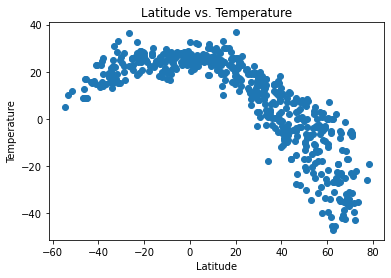

In [190]:
x_values=weather_df['Lat']
y_values=weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()
#Print(add a sentence here)

## Latitude vs. Humidity Plot

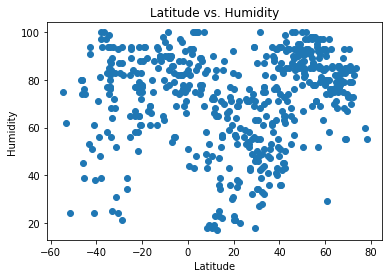

In [189]:
x_values=weather_df['Lat']
y_values=weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')
plt.show()
#Print(add a sentence here)

## Latitude vs. Cloudiness Plot

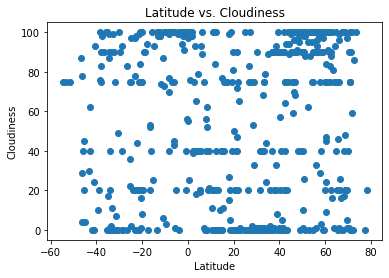

In [191]:
x_values=weather_df['Lat']
y_values=weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()
#Print(add a sentence here)

## Latitude vs. Wind Speed Plot

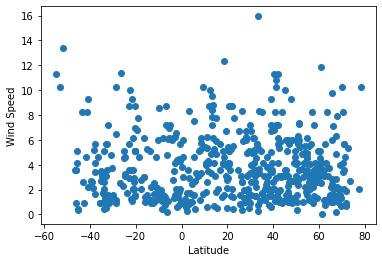

In [186]:
x_values=weather_df['Lat']
y_values=weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')
plt.show()
#Print(add a sentence here)

## Linear Regression

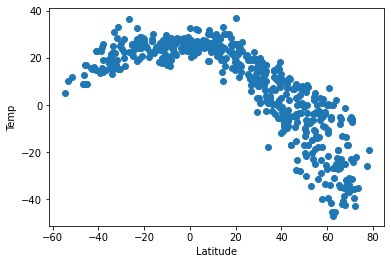

In [187]:
x_values=weather_df['Lat']
y_values=weather_df['Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()
#Print(add a sentence here)

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#options, binning

north_x_values=weather_df['Lat']
north_y_values=weather_df['Temp']
plt.scatter(north_x_values,north_y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Latitude vs. Temperature')
plt.show()
#Print(add a sentence here)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression